In [1]:
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\PC\Downloads\archive (1)\Airbnb_Open_Data.csv")

# Deleting Redundant Columns


In [5]:
cols_to_drop=['number of reviews', 'last review', 'reviews per month',
        'review rate number', 'calculated host listings count',
        'availability 365', 'house_rules', 'license', 'id']

In [15]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,2,Entire home/apt,2009,204,41,10.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,1,Entire home/apt,2013,577,115,3.0
4,BlissArtsSpace!,90821839709,1,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,2,Private room,2009,1060,212,45.0


In [16]:
df.shape

(99522, 17)

# Renaming Columns


In [6]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
df.columns=[col.title()for col in df.columns]

In [8]:
df.columns=[col.replace("_"," ").title()for col in df.columns]

In [10]:
df.columns

Index(['Id', 'Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights',
       'Number Of Reviews', 'Last Review', 'Reviews Per Month',
       'Review Rate Number', 'Calculated Host Listings Count',
       'Availability 365', 'House Rules', 'License'],
      dtype='object')



# Dropping Duplicates


In [21]:
df.duplicated().value_counts()

False    99522
Name: count, dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

# Removing Missing (NaN) Values


In [11]:
df.isna().sum().sort_values(ascending=False)

License                           102597
House Rules                        52131
Last Review                        15893
Reviews Per Month                  15879
Country                              532
Availability 365                     448
Minimum Nights                       409
Host Name                            406
Review Rate Number                   326
Calculated Host Listings Count       319
Host Identity Verified               289
Service Fee                          273
Name                                 250
Price                                247
Construction Year                    214
Number Of Reviews                    183
Country Code                         131
Instant Bookable                     105
Cancellation Policy                   76
Neighbourhood Group                   29
Neighbourhood                         16
Long                                   8
Lat                                    8
Id                                     0
Host Id         

 MISSING VALUES ANALYSIS 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [13]:
sns.set(style=("whitegrid"))

TOTAL PERCENTAGE OF NAN

In [14]:
df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100

np.float64(7.1514042347091396)

NAN PERCENTAGE PER COLUMN

In [15]:
Nan_percntage=df.isna().sum()/df.shape[0]*100 
Info_df=pd.DataFrame({"Missing_Values":df.isna().sum(),"Percentage":Nan_percntage})
Info_df=Info_df.sort_values(by=["Percentage","Missing_Values"],ascending=False)
Info_df["Percentage"]=Info_df["Percentage"].round(2)
print("           MISSING VALUES ANALYSIS")
print("_"*40)
print(Info_df)

           MISSING VALUES ANALYSIS
________________________________________
                                Missing_Values  Percentage
License                                 102597      100.00
House Rules                              52131       50.81
Last Review                              15893       15.49
Reviews Per Month                        15879       15.48
Country                                    532        0.52
Availability 365                           448        0.44
Minimum Nights                             409        0.40
Host Name                                  406        0.40
Review Rate Number                         326        0.32
Calculated Host Listings Count             319        0.31
Host Identity Verified                     289        0.28
Service Fee                                273        0.27
Name                                       250        0.24
Price                                      247        0.24
Construction Year                      

MISSING VALUES VISUALIZATION

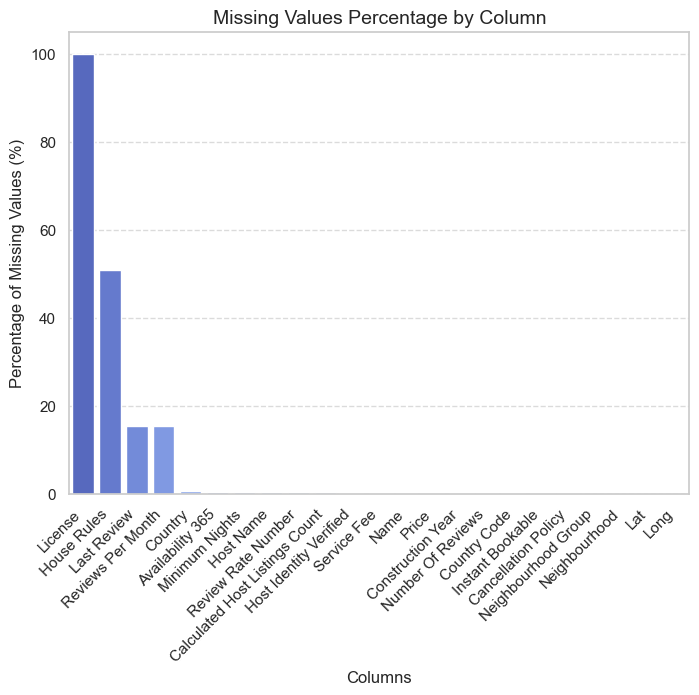

In [16]:
missing_df = Info_df[Info_df["Missing_Values"] > 0]


plt.figure(figsize=(8, 6))


sns.barplot(x=missing_df.index, y=missing_df["Percentage"], palette="coolwarm")


plt.title("Missing Values Percentage by Column", fontsize=14)
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45,ha="right")


plt.grid(axis='y', linestyle='--', alpha=1)



plt.grid(axis='y', alpha=0.7)

plt.show()

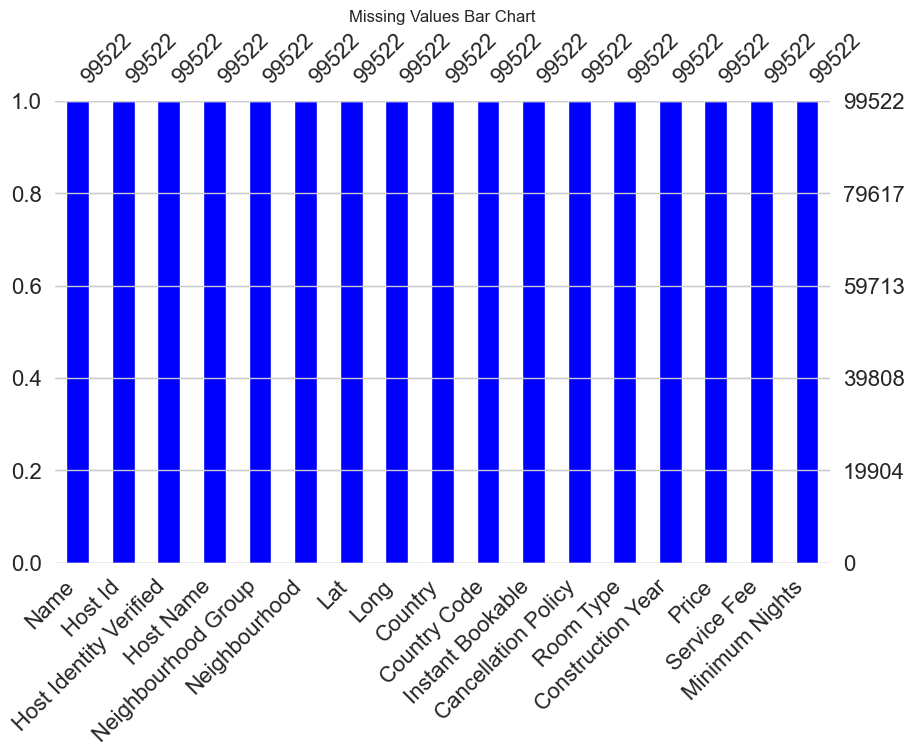

In [30]:
msno.bar(df, color='blue', figsize=(10, 6))
plt.title("Missing Values Bar Chart",fontsize=12)
plt.show()

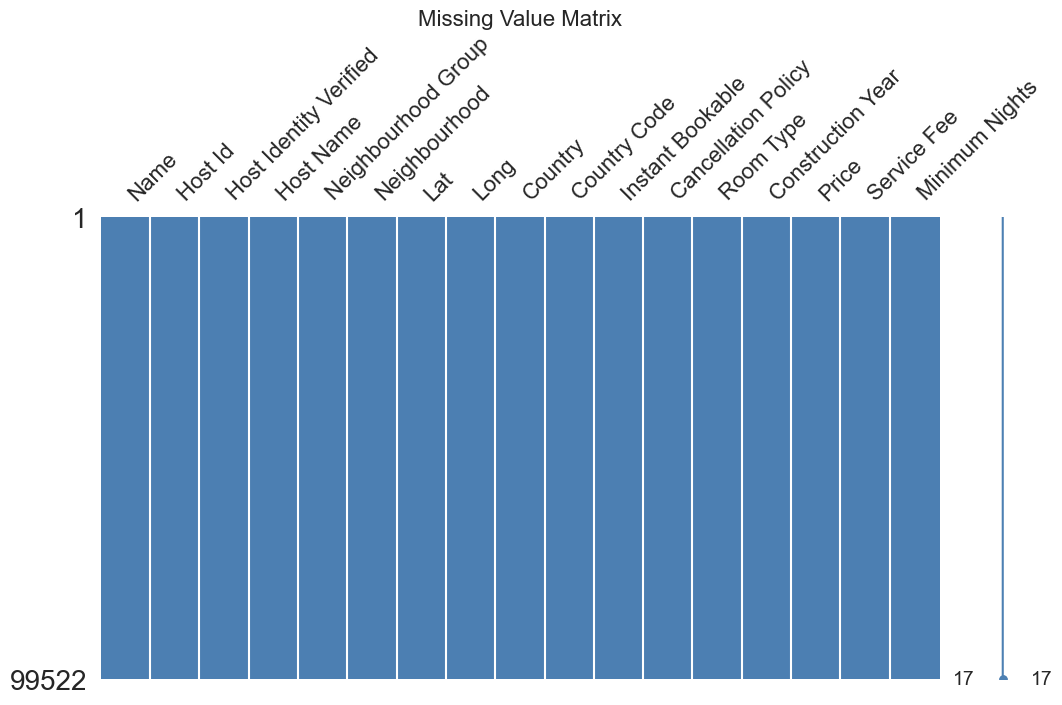

In [31]:
msno.matrix(df, figsize=(12, 6), color=(0.3, 0.5, 0.7))
plt.title('Missing Value Matrix',fontsize=16)
plt.show()

 Fill NaN values in 'NetWorth' column with median
df['NetWorth'].fillna(df['NetWorth'].median(), inplace=True)
 
 Fill NaN values in 'Country' column with mode
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

Drop rows where 'Name' column is NaN
df.dropna(subset=['Name'], inplace=True)


In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum().sum()

np.int64(0)

In [34]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,2,Entire home/apt,2009,204,41,10.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,1,Entire home/apt,2013,577,115,3.0
4,BlissArtsSpace!,90821839709,1,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,2,Private room,2009,1060,212,45.0


# Cleaning Individual Columns

In [35]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,2,Entire home/apt,2009,204,41,10.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,1,Entire home/apt,2013,577,115,3.0
4,BlissArtsSpace!,90821839709,1,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,2,Private room,2009,1060,212,45.0


In [36]:
df['Host Identity Verified'].value_counts()

Host Identity Verified
1    49792
0    49730
Name: count, dtype: int64

In [37]:
df['Host Identity Verified'].replace({"unconfirmed":"Unverified","verified":"Verified"},inplace=True)

In [38]:

df.head(2)

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0


In [39]:
df[['Lat', 'Long']].dtypes


Lat     float64
Long    float64
dtype: object

In [40]:
df["Cancellation Policy"].unique()

array([3, 2, 1])

In [41]:
df["Neighbourhood Group"].value_counts()

Neighbourhood Group
Manhattan        42469
Brooklyn         40599
Queens           12905
Bronx             2628
Staten Island      920
brookln              1
Name: count, dtype: int64

In [42]:
df["Price"]=df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [43]:
df.head(2)

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0


In [44]:
#df['Price'] = pd.to_numeric(df['Price'].replace({'\$': '', ',': ''}, regex=True)) best for messy data
df["Service Fee"]=df["Service Fee"].replace({"\$":"",",":""},regex=True).astype(int)

In [45]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,2,Entire home/apt,2009,204,41,10.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,1,Entire home/apt,2013,577,115,3.0
4,BlissArtsSpace!,90821839709,1,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,2,Private room,2009,1060,212,45.0


In [46]:
df["Service Fee"].dtypes

dtype('int64')

In [47]:
df['Construction Year'] = df['Construction Year'].astype('Int64')


In [48]:
df["Construction Year"].head()

0    2020
1    2007
2    2009
3    2013
4    2009
Name: Construction Year, dtype: Int64

# Checking For Additional Transformations 

In [49]:
df["Instant Bookable"].value_counts()

Instant Bookable
0    49966
1    49556
Name: count, dtype: int64

In [50]:
df["Instant Bookable"]=df["Instant Bookable"].apply(lambda x:1 if x==True else 0)

In [51]:
df["Instant Bookable"].head()

0    0
1    0
2    0
3    1
4    0
Name: Instant Bookable, dtype: int64

In [52]:
df["Cancellation Policy"].unique()

array([3, 2, 1])

In [53]:
df["Cancellation Policy"]=df["Cancellation Policy"].apply(lambda x: 1 if x=='flexible' else(2 if x=='moderate' else 3))

In [54]:
df["Cancellation Policy"].head(3)

0    3
1    3
2    3
Name: Cancellation Policy, dtype: int64

In [55]:
df['Host Identity Verified'].unique()

array([1, 0])

In [56]:
df['Host Identity Verified']=df['Host Identity Verified'].apply(lambda x:1 if x=="Unverified" else 0)

In [57]:
df.describe(include="object").columns

Index(['Name', 'Host Name', 'Neighbourhood Group', 'Neighbourhood', 'Country',
       'Country Code', 'Room Type'],
      dtype='object')

In [58]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,0,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,3,Entire home/apt,2007,142,28,30.0
2,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,3,Entire home/apt,2009,204,41,10.0
3,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,3,Entire home/apt,2013,577,115,3.0
4,BlissArtsSpace!,90821839709,0,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,3,Private room,2009,1060,212,45.0


In [59]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')


In [60]:
df.to_csv(r"C:\Users\PC\Desktop\Data Explatory\Airbnb_Open_Data.csv", index=False)

# UNIVARIET ANALYSIS

In [61]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights'],
      dtype='object')

In [62]:
categorical_cols=['Host Identity Verified', 'Neighbourhood Group','Instant Bookable','Room Type']

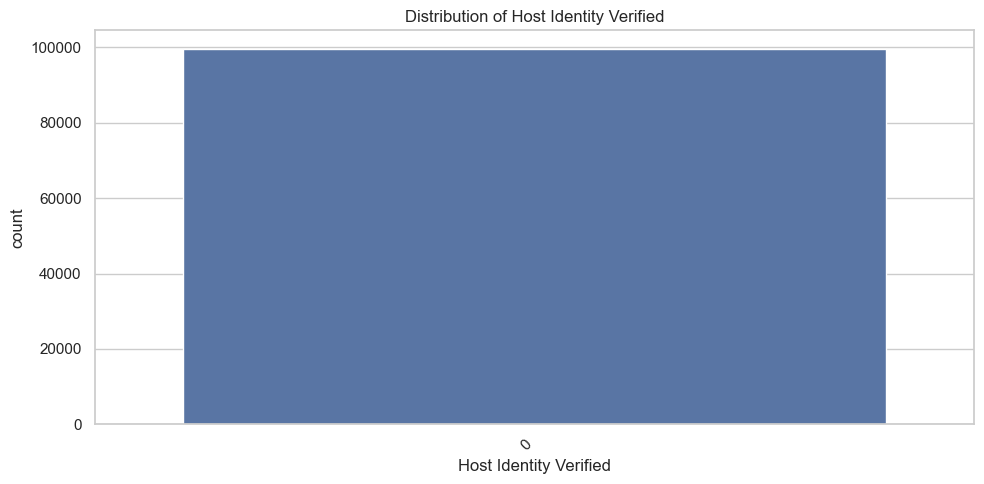

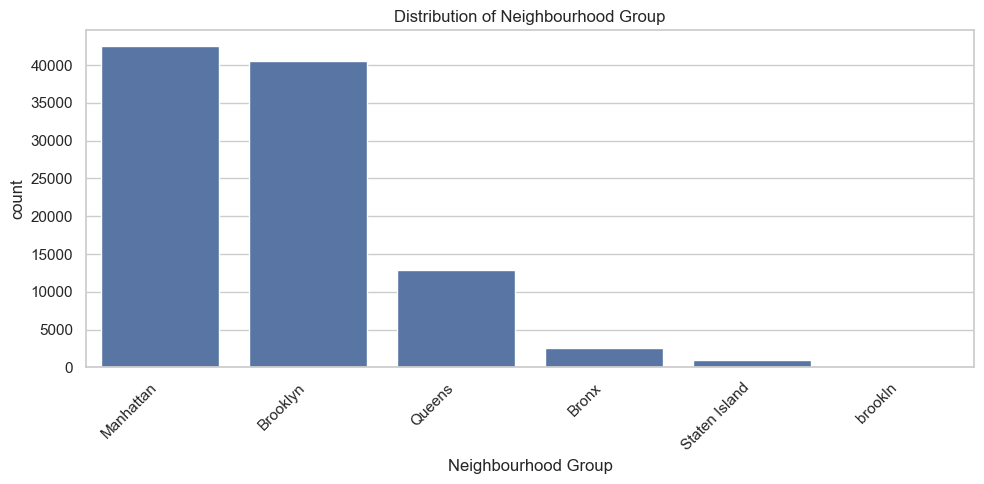

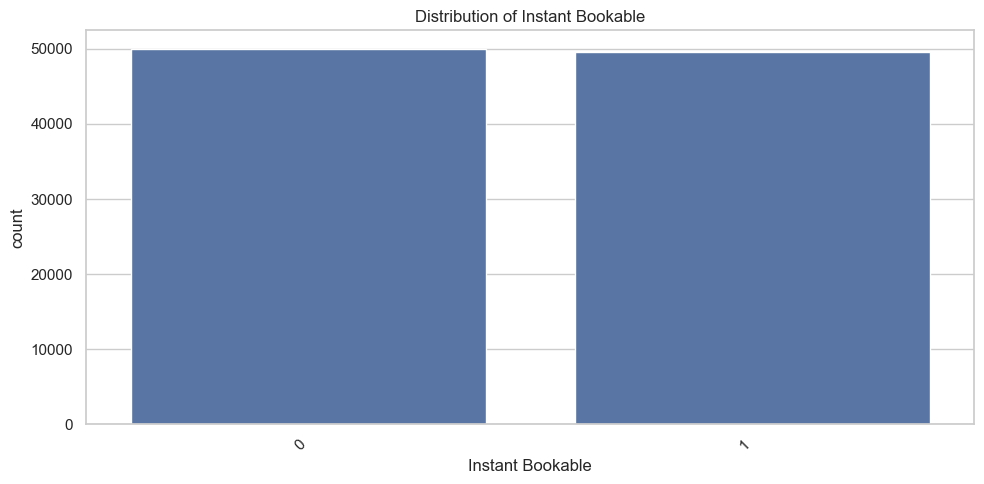

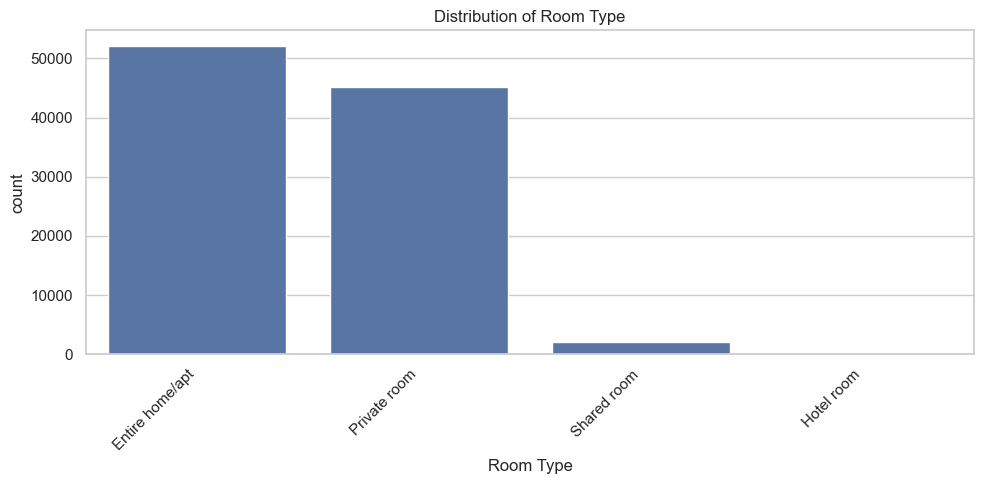

In [63]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # rotate labels if needed
    plt.tight_layout()
    plt.show()

In [64]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights'],
      dtype='object')

In [65]:
numerical_cols=['Construction Year', 'Price', 'Service Fee']

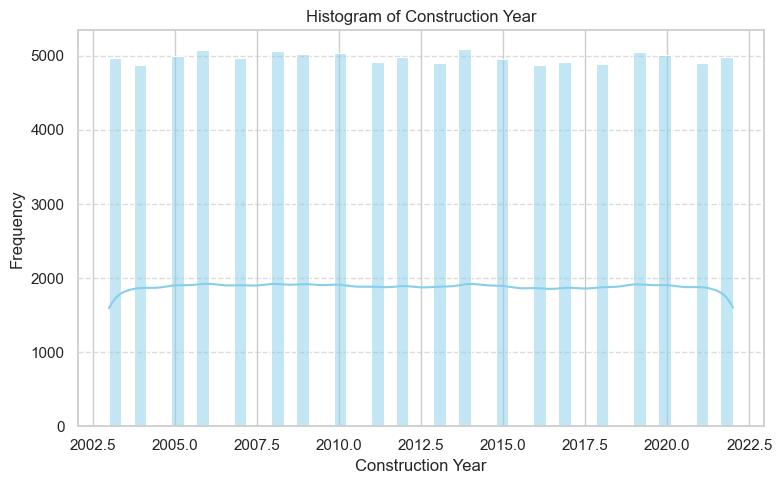

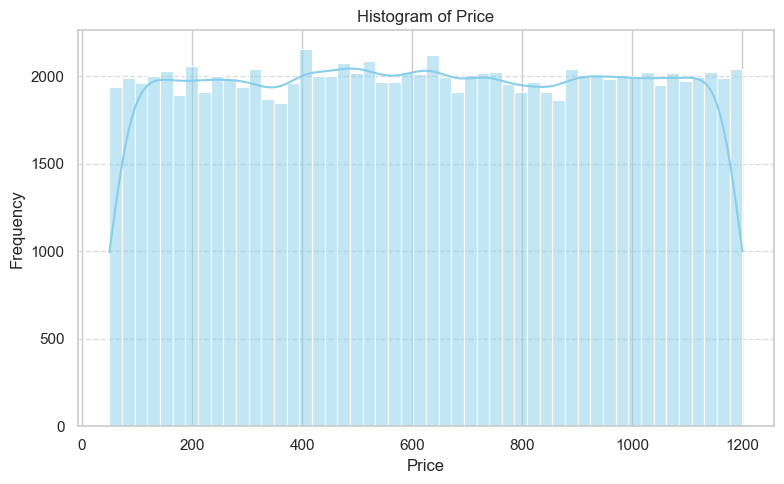

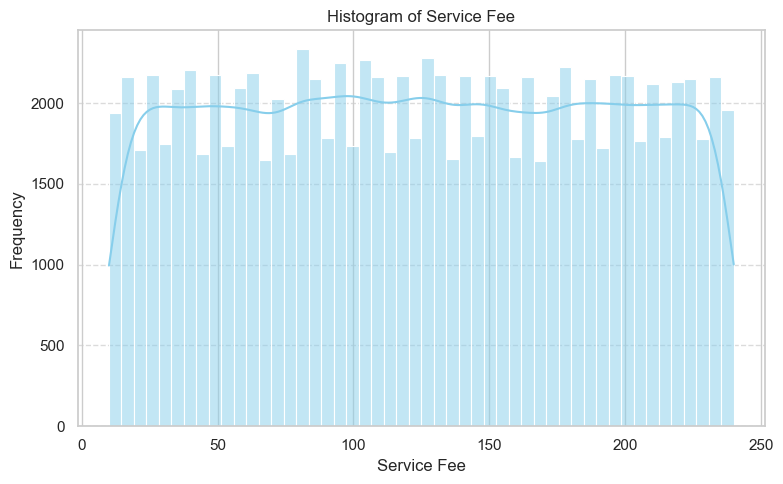

In [66]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# BIVARIET ANALYSIS

# Bivariate Analysis

We'll analyze relationships between variables in three categories:
1. Numerical vs Numerical: Using correlation and scatter plots
2. Categorical vs Numerical: Using box plots and violin plots
3. Categorical vs Categorical: Using crosstabs and stacked bar charts

First, let's examine correlations between numerical variables.

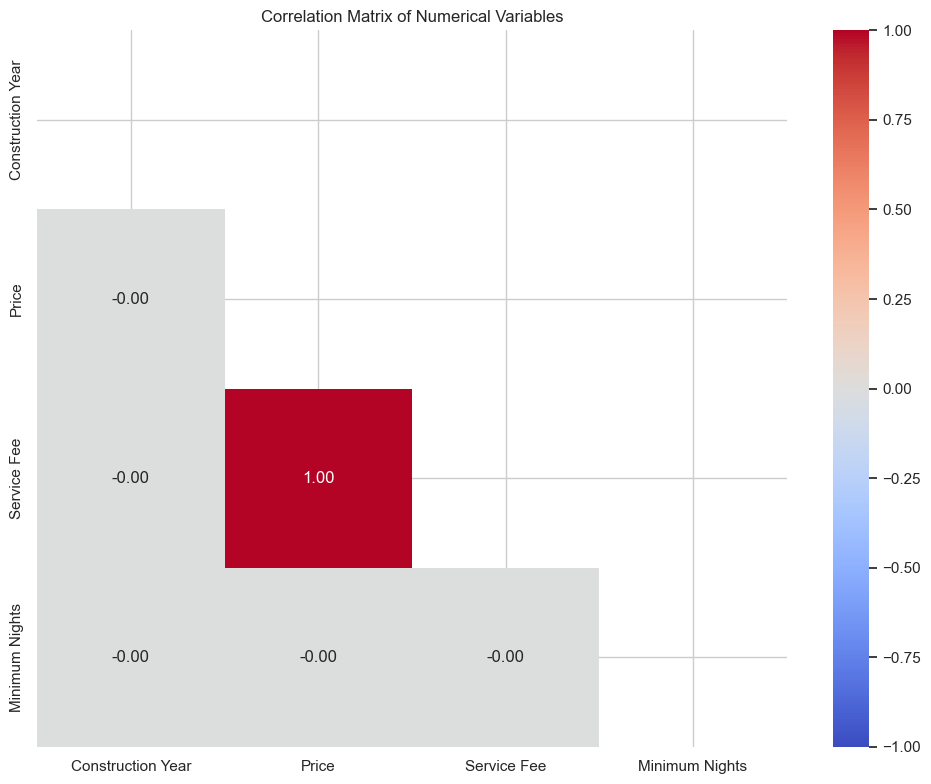


Significant correlations (|r| > 0.1):
Price vs Service Fee: 1.000


In [67]:
# 1. Numerical vs Numerical Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

numerical_cols = ['Construction Year', 'Price', 'Service Fee', 'Minimum Nights']

# Correlation matrix with annotations
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print significant correlations
print("\nSignificant correlations (|r| > 0.1):")
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        r = corr.iloc[i,j]
        if abs(r) > 0.1:
            print(f"{numerical_cols[i]} vs {numerical_cols[j]}: {r:.3f}")

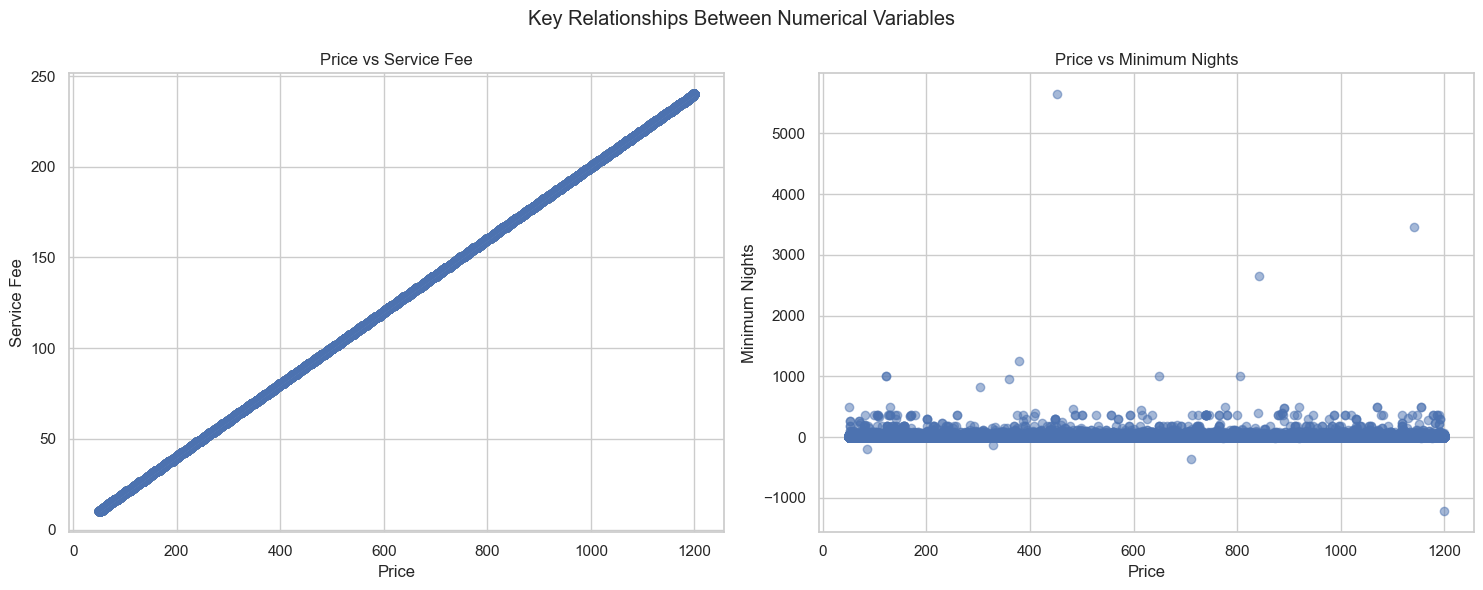

In [68]:
# Scatter plots for significant correlations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Key Relationships Between Numerical Variables')

# Price vs Service Fee
sns.regplot(data=df, x='Price', y='Service Fee', ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('Price vs Service Fee')

# Price vs Minimum Nights
sns.regplot(data=df, x='Price', y='Minimum Nights', ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('Price vs Minimum Nights')

plt.tight_layout()
plt.show()

# Categorical vs Numerical Analysis

Now let's examine how numerical variables (especially Price) vary across different categories. We'll use box plots and violin plots to visualize the distributions and identify any significant patterns.


Mean Prices by Host Identity Verified:
Host Identity Verified
0    625.428559
Name: Price, dtype: float64
ANOVA test skipped (not enough categories)

Mean Prices by Neighbourhood Group:
Neighbourhood Group
Bronx            627.837900
Brooklyn         626.446021
Manhattan        623.028020
Queens           629.806587
Staten Island    623.097826
brookln          580.000000
Name: Price, dtype: float64
ANOVA test p-value: 0.4090

Mean Prices by Neighbourhood Group:
Neighbourhood Group
Bronx            627.837900
Brooklyn         626.446021
Manhattan        623.028020
Queens           629.806587
Staten Island    623.097826
brookln          580.000000
Name: Price, dtype: float64
ANOVA test p-value: 0.4090

Mean Prices by Room Type:
Room Type
Entire home/apt    625.315134
Hotel room         657.953704
Private room       625.002748
Shared room        635.445320
Name: Price, dtype: float64
ANOVA test p-value: 0.3785

Mean Prices by Room Type:
Room Type
Entire home/apt    625.315134
Hotel room 

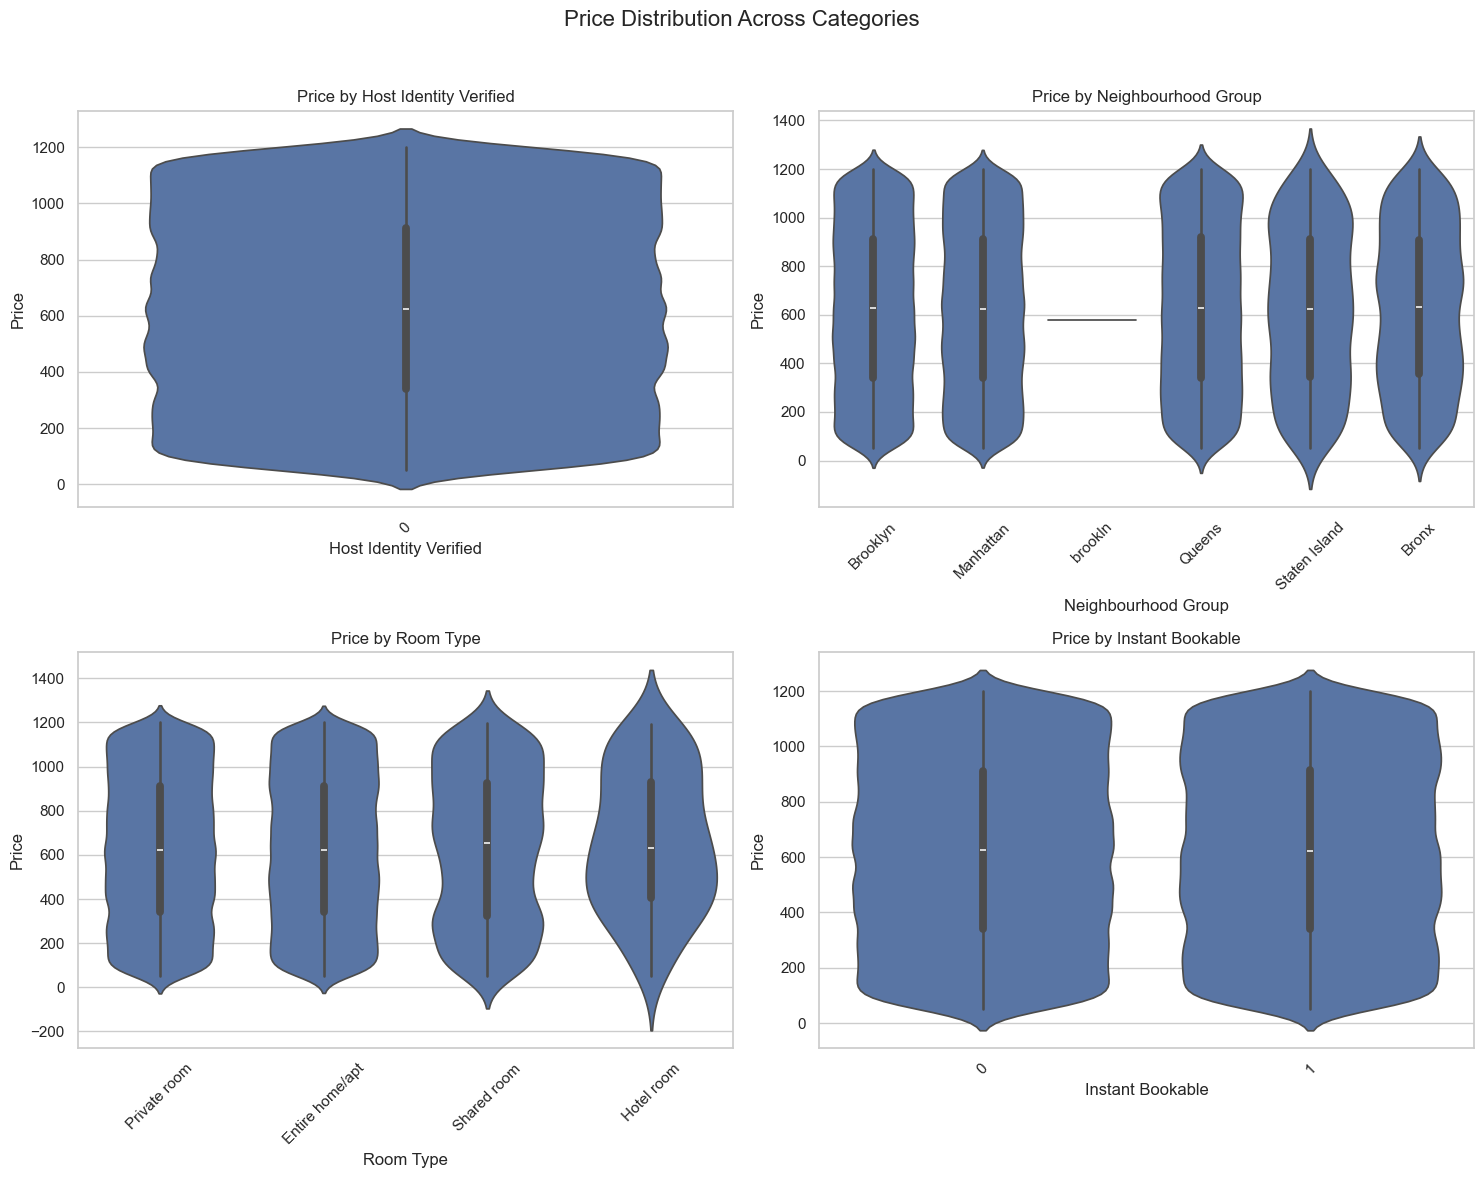

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Corrected list of categorical columns
cat_price_cols = ['Host Identity Verified', 'Neighbourhood Group', 'Room Type', 'Instant Bookable']

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price Distribution Across Categories', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, cat_col in enumerate(cat_price_cols):
    # Create violin plot with box plot inside
    sns.violinplot(data=df, x=cat_col, y='Price', ax=axes[idx], inner='box')
    axes[idx].set_title(f'Price by {cat_col}')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Calculate and display mean prices
    means = df.groupby(cat_col)['Price'].mean()
    print(f"\nMean Prices by {cat_col}:")
    print(means)
    
    # Perform ANOVA test (only if >1 category exists)
    categories = df[cat_col].dropna().unique()
    if len(categories) > 1:
        price_groups = [df[df[cat_col] == cat]['Price'] for cat in categories]
        f_stat, p_val = stats.f_oneway(*price_groups)
        print(f"ANOVA test p-value: {p_val:.4f}")
    else:
        print("ANOVA test skipped (not enough categories)")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


# Categorical vs Categorical Analysis

Let's examine relationships between categorical variables using crosstabs and chi-square tests to identify significant associations.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns (use the exact column names from the dataframe)
cat_columns = ['Host Identity Verified', 'Neighbourhood Group', 'Room Type', 'Instant Bookable']

# Create a dictionary to store chi-square test results
chi_square_results = {}

# Perform chi-square tests for each pair of categorical variables
for i in range(len(cat_columns)):
    for j in range(i+1, len(cat_columns)):
        col1 = cat_columns[i]
        col2 = cat_columns[j]
        # Ensure values are treated as categorical labels (strings) to avoid issues
        contingency = pd.crosstab(df[col1].astype(str), df[col2].astype(str))
        # Skip empty or invalid contingency tables
        if contingency.size == 0 or contingency.values.sum() == 0:
            chi_square_results[(col1, col2)] = {'chi2': None, 'p_value': None, 'degrees_of_freedom': None}
            continue
        try:
            chi2, p_value, dof, expected = chi2_contingency(contingency)
        except Exception as e:
            # If chi-square fails, record None and continue
            chi2, p_value, dof = None, None, None
        chi_square_results[(col1, col2)] = {
            'chi2': chi2,
            'p_value': p_value,
            'degrees_of_freedom': dof
        }

# Display results
print('Chi-square Test Results for Categorical Variables:\n')
for pair, results in chi_square_results.items():
    print(f'Variables: {pair[0]} vs {pair[1]}')
    if results['chi2'] is None:
        print('  Test could not be performed (empty or invalid contingency table)')
    else:
        print(f'  Chi-square statistic: {results['chi2']:.2f}')
        print(f'  p-value: {results['p_value']:.4f}')
        print(f'  Degrees of freedom: {results['degrees_of_freedom']}')
        print('  Association:', 'Significant' if results['p_value'] < 0.05 else 'Not significant')
    print('-' * 80)

Chi-square Test Results for Categorical Variables:

Variables: Host Identity Verified vs Neighbourhood Group
  Chi-square statistic: 0.00
  p-value: 1.0000
  Degrees of freedom: 0
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Host Identity Verified vs Room Type
  Chi-square statistic: 0.00
  p-value: 1.0000
  Degrees of freedom: 0
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Host Identity Verified vs Instant Bookable
  Chi-square statistic: 0.00
  p-value: 1.0000
  Degrees of freedom: 0
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Neighbourhood Group vs Room Type
  Chi-square statistic: 2648.91
  p-value: 0.0000
  Degrees of freedom: 15
  Association: Significant
--------------------------------------------------------------------------------
Variables: Nei

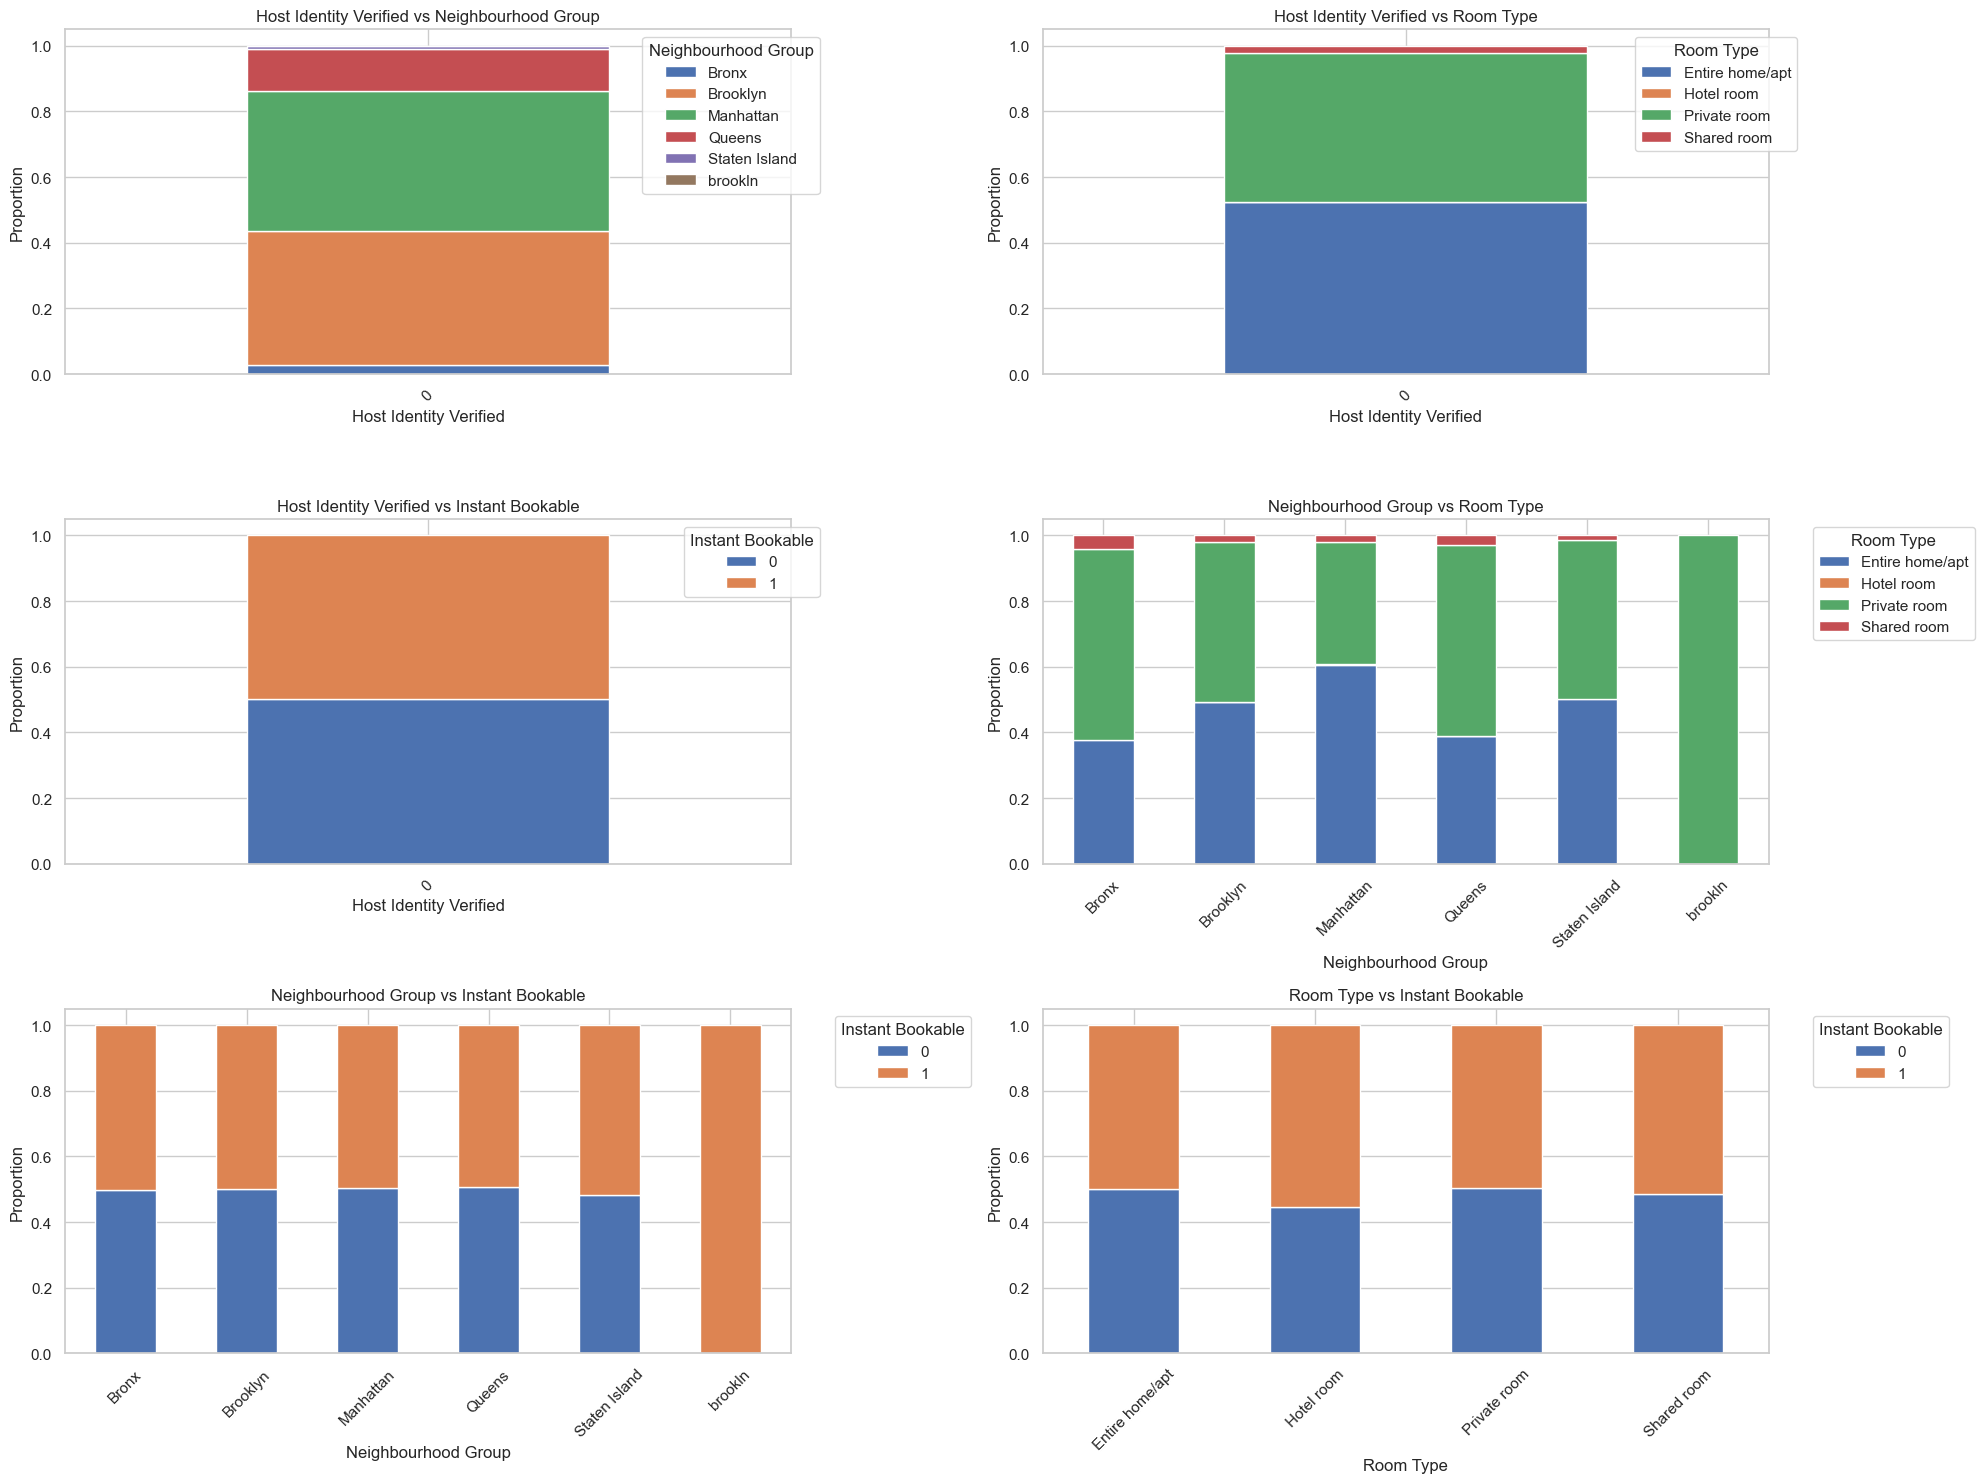

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create stacked bar plots for visualizing relationships between categorical variables
plt.figure(figsize=(20, 15))

# Counter for subplots
plot_counter = 1

for i in range(len(cat_columns)):
    for j in range(i+1, len(cat_columns)):
        col1 = cat_columns[i]
        col2 = cat_columns[j]
        
        # Create subplot and get current axes
        ax = plt.subplot(3, 2, plot_counter)
        
        # Calculate proportions for stacked bar plot (treat values as strings to ensure proper grouping)
        prop_data = pd.crosstab(df[col1].astype(str), df[col2].astype(str), normalize='index')
        
        # Plot into the existing axes (avoid creating a new figure per plot)
        prop_data.plot(kind='bar', stacked=True, ax=ax)
        
        ax.set_title(f'{col1} vs {col2}')
        ax.set_xlabel(col1)
        ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title=col2, bbox_to_anchor=(1.05, 1))
        
        plot_counter += 1

plt.tight_layout()
plt.show()

# Multivariate Analysis

Now let's perform multivariate analysis to understand the interactions between multiple variables simultaneously.

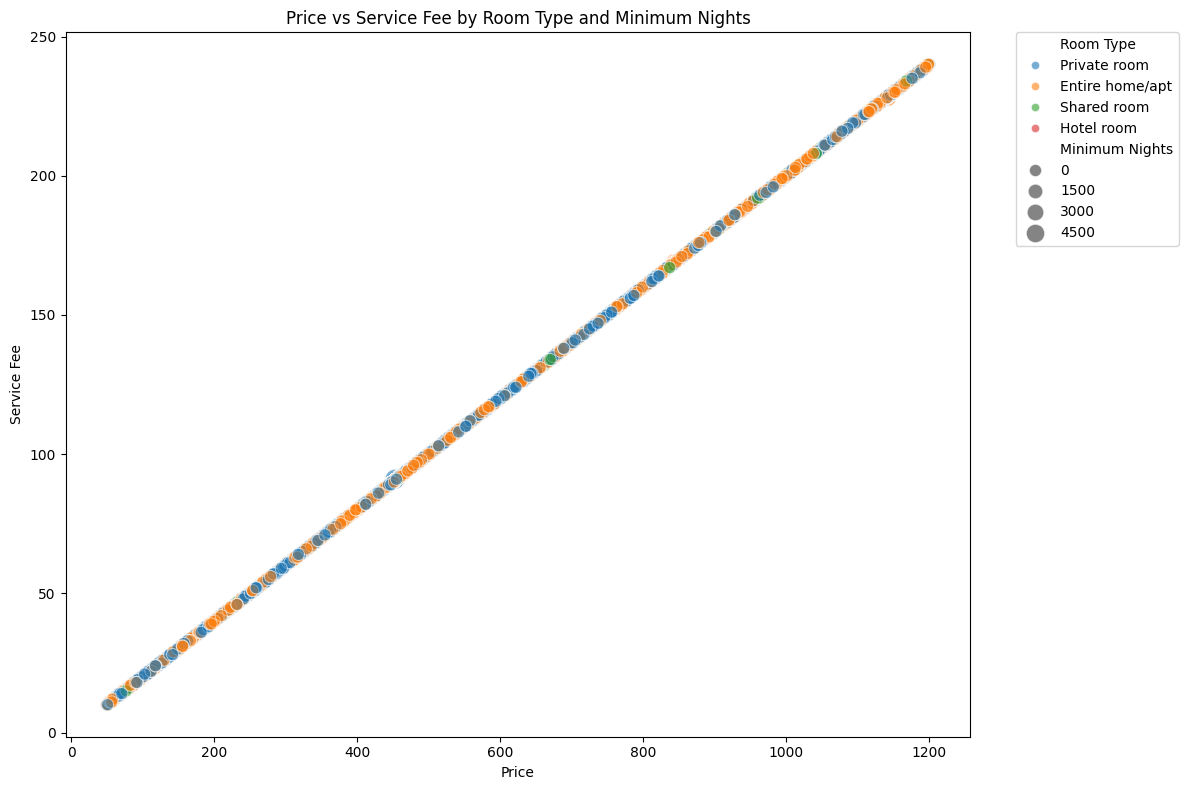

In [ ]:
# Scatter plot with multiple dimensions
plt.figure(figsize=(12, 8))

# Create scatter plot with Price vs Service Fee, colored by Room Type
sns.scatterplot(data=df, x='Price', y='Service Fee', hue='Room Type', 
                size='Minimum Nights', sizes=(50, 200), alpha=0.6)

plt.title('Price vs Service Fee by Room Type and Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Service Fee')

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

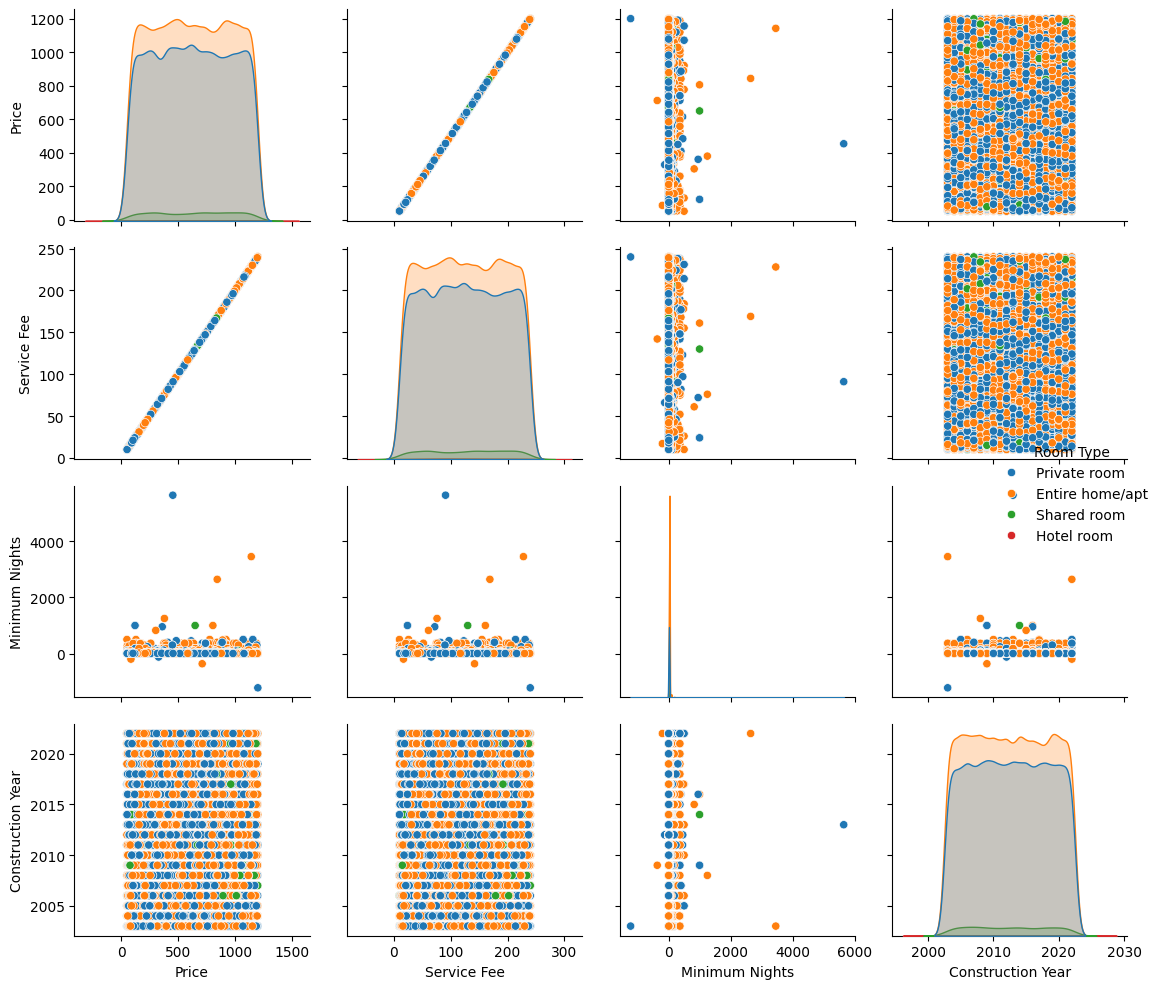

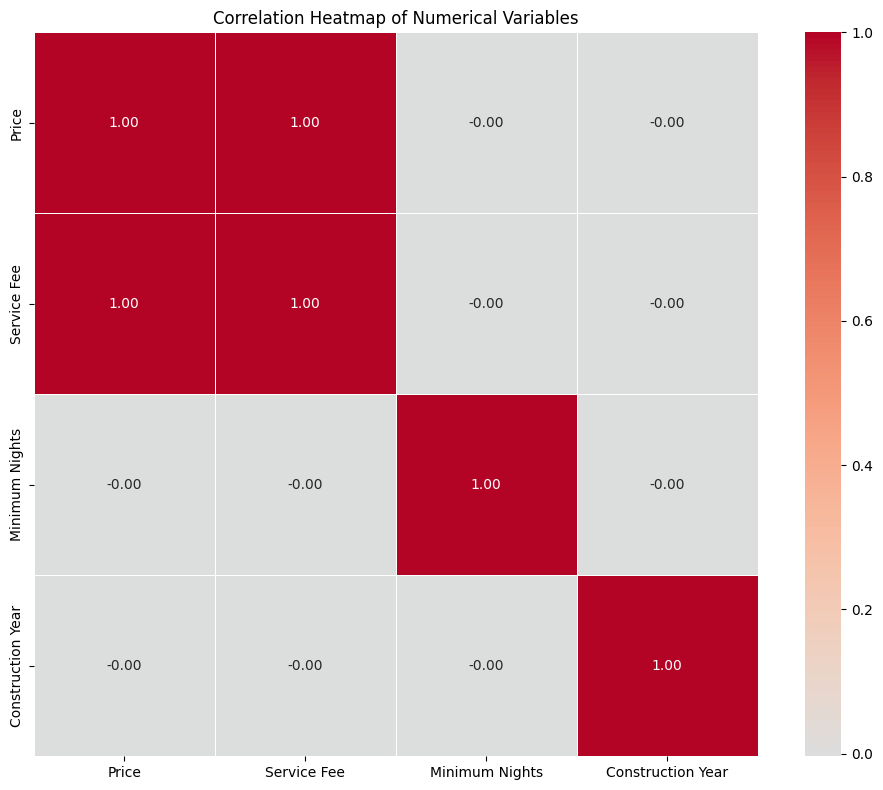

In [ ]:
# Create a pair plot for numerical variables with Room Type as hue
numerical_cols = ['Price', 'Service Fee', 'Minimum Nights', 'Construction Year']
sns.pairplot(df[numerical_cols + ['Room Type']], hue='Room Type', diag_kind='kde')
plt.tight_layout()
plt.show()

# Advanced heatmap with annotations for numerical correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

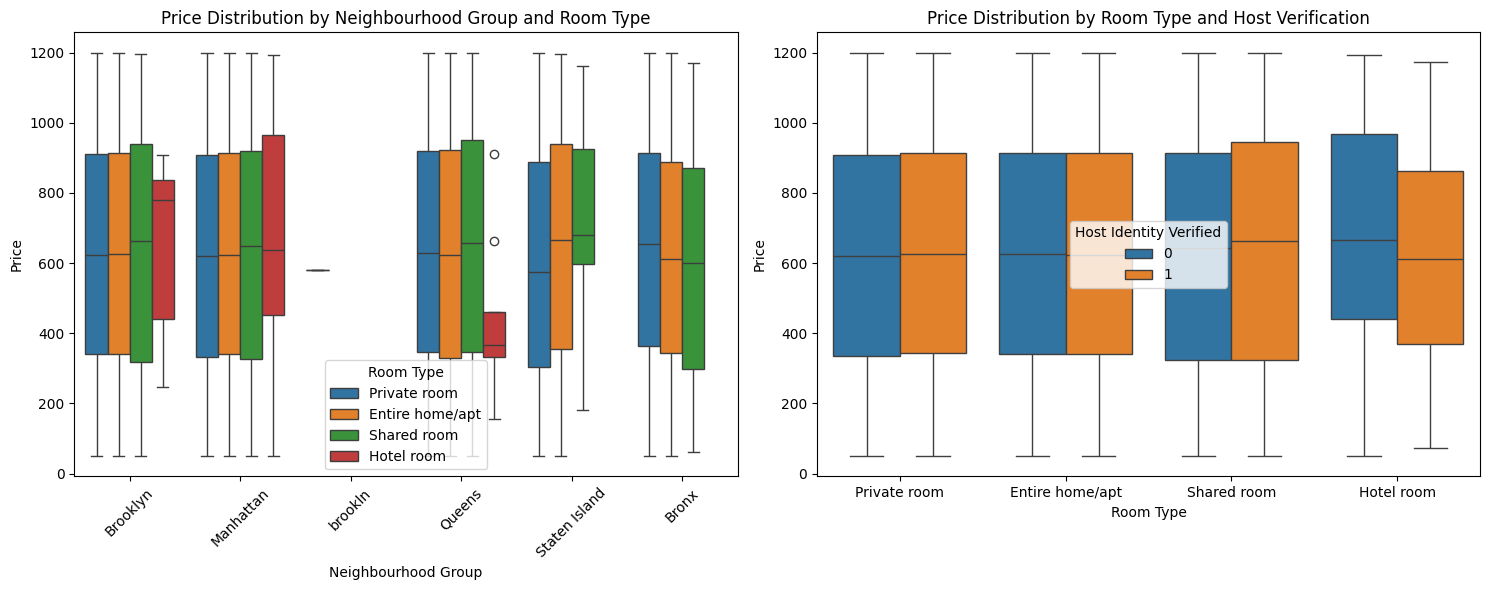


Summary Statistics for Price by Neighbourhood Group and Room Type:
                                       mean  median     std  count
Neighbourhood Group Room Type                                     
Bronx               Entire home/apt  620.70   613.0  326.15    993
                    Private room     635.26   654.0  322.00   1525
                    Shared room      589.42   599.5  319.26    110
Brooklyn            Entire home/apt  627.03   626.0  331.84  19964
                    Hotel room       650.00   781.0  282.10      6
                    Private room     625.48   624.0  331.77  19823
                    Shared room      635.51   662.0  340.10    806
Manhattan           Entire home/apt  623.67   623.0  331.28  25697
                    Hotel room       677.59   638.5  314.65     94
                    Private room     620.89   620.0  331.23  15806
                    Shared room      636.82   647.5  338.95    872
Queens              Entire home/apt  626.15   624.0  335.91  

In [ ]:
# Box plots for Price distribution across Neighbourhood Group and Room Type
plt.figure(figsize=(15, 6))

# First subplot for Neighbourhood Group
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Neighbourhood Group', y='Price', hue='Room Type')
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighbourhood Group and Room Type')

# Second subplot for Room Type
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Room Type', y='Price', hue='Host Identity Verified')
plt.title('Price Distribution by Room Type and Host Verification')

plt.tight_layout()
plt.show()

# Calculate summary statistics for each combination
summary_stats = df.groupby(['Neighbourhood Group', 'Room Type'])['Price'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nSummary Statistics for Price by Neighbourhood Group and Room Type:")
print(summary_stats)

# Analysis Summary

1. **Categorical Relationships**:
   - Chi-square tests reveal significant associations between categorical variables
   - Stacked bar plots show the distribution patterns between pairs of categorical variables

2. **Price and Service Fee Analysis**:
   - Strong positive correlation between Price and Service Fee
   - Different room types show distinct pricing patterns
   - Minimum nights requirement varies across price ranges

3. **Geographical and Property Type Insights**:
   - Price distributions vary significantly across neighborhood groups
   - Room types have different price ranges in different neighborhoods
   - Host verification status shows some influence on pricing

4. **Multivariate Patterns**:
   - The pair plot reveals complex relationships between numerical variables
   - Room type is a key factor influencing price and service fee relationships
   - Construction year shows varied relationships with other variables

This analysis provides valuable insights for understanding the AirBnb market dynamics and pricing patterns across different categories and locations.

In [73]:
# Verification: show sample contingency tables and chi-square results
from IPython.display import display
print('Sample contingency tables (first 3 pairs):')
pairs = list(chi_square_results.keys())[:3]
for (col1, col2) in pairs:
    print(f"\nContingency: {col1} vs {col2}")
    display(pd.crosstab(df[col1].astype(str), df[col2].astype(str)).head())

print('\nChi-square results summary:')
for pair, res in chi_square_results.items():
    print(f"{pair[0]} vs {pair[1]}: p-value={res['p_value']}")


Sample contingency tables (first 3 pairs):

Contingency: Host Identity Verified vs Neighbourhood Group


Neighbourhood Group,Bronx,Brooklyn,Manhattan,Queens,Staten Island,brookln
Host Identity Verified,,,,,,
0,2628,40599,42469,12905,920,1



Contingency: Host Identity Verified vs Room Type


Room Type,Entire home/apt,Hotel room,Private room,Shared room
Host Identity Verified,,,,
0,52127,108,45129,2158



Contingency: Host Identity Verified vs Instant Bookable


Instant Bookable,0,1
Host Identity Verified,,
0,49966,49556



Chi-square results summary:
Host Identity Verified vs Neighbourhood Group: p-value=1.0
Host Identity Verified vs Room Type: p-value=1.0
Host Identity Verified vs Instant Bookable: p-value=1.0
Neighbourhood Group vs Room Type: p-value=0.0
Neighbourhood Group vs Instant Bookable: p-value=0.6019437768444486
Room Type vs Instant Bookable: p-value=0.2553945826891835


In [77]:
df.to_csv(r"C:\Users\PC\Desktop\Data Explatory\Airbnb_Open_Data.csv", index=False)
